### 5. Geographical Performance

This section analyzes regional contributions to the overall sales performance, offering insights for resource allocation and targeted marketing campaigns. The key analyses performed are:

1. Regional Sales Leadership: Total units sold by region from 2022–2024 to determine the highest-performing markets
2. Y-o-Y Revenue Growth across all regions
3. Categorical Sales Trend over Time: Units sold for each product category across the years to identify long-term demand trends within the regions

In [2]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations (though less used here, it's a good practice)
import numpy as np

# Import matplotlib.pyplot for basic plotting
import matplotlib.pyplot as plt

# Import seaborn for enhanced statistical data visualization
import seaborn as sns

# Configure display options for better readability
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Retail\retail_sales_synthetic.csv")

In [4]:
# Convert the 'date' column to datetime objects
df["date"] = pd.to_datetime(df["date"])

# Extract the Year and Month into new columns for easy grouping and analysis
df["Year"] = df["date"].dt.year
df["Month"] = df["date"].dt.month

print("New columns 'Year' and 'Month' created successfully.")
print(df[['date', 'Year', 'Month']].head())

New columns 'Year' and 'Month' created successfully.
        date  Year  Month
0 2024-09-05  2024      9
1 2022-10-24  2022     10
2 2023-04-19  2023      4
3 2024-06-22  2024      6
4 2024-07-20  2024      7


#### 5.1 Regional Sales Leadership


Total Units Sold by Region (2022-2024): 
region
South    209292
East     202893
North    140047
West     133916
Name: units_sold, dtype: int64


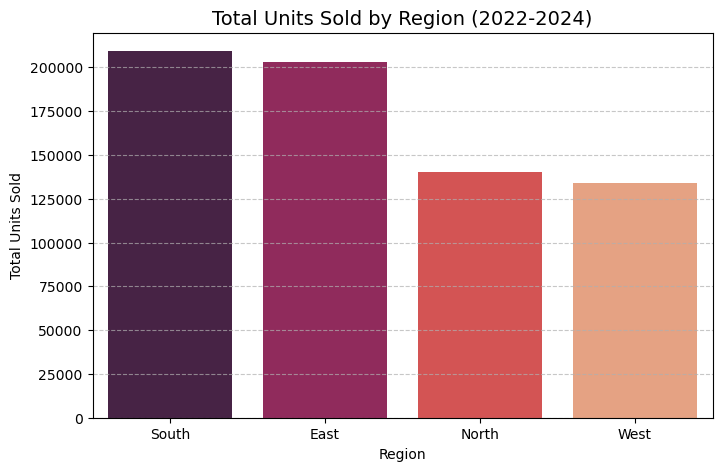

In [5]:
# Total units sold across all regions
regional_total_sales = df.groupby("region")["units_sold"].sum().sort_values(ascending=False)

print("\nTotal Units Sold by Region (2022-2024): ")
print(regional_total_sales)

# Visualization: Total Units Sold by Region
plt.figure(figsize=(8, 5))
sns.barplot(x=regional_total_sales.index, y=regional_total_sales.values, palette="rocket")
plt.title('Total Units Sold by Region (2022-2024)', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Observation:
# South and East regions are the major carriers of sales (share of ~66% in Total sales)
# North and West coming next in line

#### 5.2 Regional Sales Trend over Time

In [6]:
# Units sold by Region across years

# Total units sold per region for each year
regional_annual_sales = df.groupby(["region", "Year"])["units_sold"].sum().unstack(fill_value=0)

# Add a 'Total' column to calculate overall units sold across all years for each region
regional_annual_sales["Total"] = regional_annual_sales.sum(axis=1)

# Sort regions by their total units sold in descending order
regional_annual_sales = regional_annual_sales.sort_values(by = "Total", ascending = False) 

print("\n Units Sold by Region across Years: ")
print(regional_annual_sales)

# Observation:
# - **South** remained the top performing region and witnessed an increase, in terms of sales volume
# - **North** witnessed a constant decline in units sold across the years
# - **West** is the lowest contributor of sales but shows a stable trend
# - **East** observed a stable growth across the years


 Units Sold by Region across Years: 
Year     2022   2023   2024   Total
region                             
South   70103  69266  69923  209292
East    67722  67752  67419  202893
North   47016  46719  46312  140047
West    44996  44354  44566  133916


#### 5.3 Categorical Sales Trend over Time

In [7]:
#Total Sales across categories across years

# Total units sold per category for each year
cat_sales_trend = df.groupby(["category","Year"])["units_sold"].sum().unstack().sort_values(by=2024, ascending = False)

# Add a 'Total' column to calculate overall units sold across all years for each category
cat_sales_trend["Total"]=cat_sales_trend.sum(axis=1)

print("\n Units Sold by Categories across Years: ")
print(cat_sales_trend)


# Observation:
# Clothing and Home happens to be top selling categories across the years, Electronics coming next in line
# However, sales witnessed a major decline from **Home** and **Electronics** segment
# Beauty and Sports are the least sold products


 Units Sold by Categories across Years: 
Year          2022   2023   2024   Total
category                                
Clothing     78689  77110  78069  233868
Home         67591  68721  68065  204377
Electronics  47912  46923  46830  141665
Beauty       19461  19442  19299   58202
Sports       16184  15895  15957   48036


#### 5.4 Electronics segment declining sales, across the years

In [14]:
#Total Sales across Electronics categories across years

# Filter the data with category = Electronics
Elec_sales_yrs = df[df["category"] == "Electronics"]

# Total units sold in Electronics segment for each year
New_Sales_Elec = Elec_sales_yrs.groupby(["region","Year"])["units_sold"].sum().unstack()

# Add a 'Total' column to calculate overall units sold across all years for each category
New_Sales_Elec["Total"]=New_Sales_Elec.sum(axis=1)

# Sort values by Total column
New_Sales_Elec= New_Sales_Elec.sort_values(by="Total", ascending = False)


print("\n Units Sold by Categories across Years: ")
print(New_Sales_Elec)


# Observation:
# East region was the major contributor to the declining sales in the Electronics segment (in Absolute terms) 
# Whereas, South, and North regions witnessed an increasing sales


 Units Sold by Categories across Years: 
Year     2022   2023   2024  Total
region                            
South   14531  14101  14238  42870
East    14358  14085  13697  42140
North    9759   9519   9648  28926
West     9264   9218   9247  27729
